# Example Usage of Nucleotides code

In [1]:
using HMMIDMethods
using HMMIDConfig
using Nucleotides
quality = Int8(log10(0.001)*-10)
symbols = Array{DNASymbol,1}(Array{Char,1}("GATAACAGGATACCTAGATAGATGATGATCCATG"))
example_observed_sequence = FastqSequence("Example", symbols, fill(quality, length(symbols)))

Nucleotides.FastqSequence("Example",Union{Nucleotides.DNANucCombo,Nucleotides.DNANucleotide}[DNA_G,DNA_A,DNA_T,DNA_A,DNA_A,DNA_C,DNA_A,DNA_G,DNA_G,DNA_A  …  DNA_A,DNA_T,DNA_G,DNA_A,DNA_T,DNA_C,DNA_C,DNA_A,DNA_T,DNA_G],Int8[30,30,30,30,30,30,30,30,30,30  …  30,30,30,30,30,30,30,30,30,30])

In [2]:
using States
example_template = Template("Example", string_to_state_array("*GATTACAnnnnnACCTAG*"))

HMMIDConfig.Template("Example",States.AbstractState[States.StartingState(),States.RepeatingAnyState(DNA_N),States.ObservableState(DNA_G),States.ObservableState(DNA_A),States.ObservableState(DNA_T),States.ObservableState(DNA_T),States.ObservableState(DNA_A),States.ObservableState(DNA_C),States.ObservableState(DNA_A),States.BarcodeState(DNA_N)  …  States.BarcodeState(DNA_N),States.BarcodeState(DNA_N),States.BarcodeState(DNA_N),States.ObservableState(DNA_A),States.ObservableState(DNA_C),States.ObservableState(DNA_C),States.ObservableState(DNA_T),States.ObservableState(DNA_A),States.ObservableState(DNA_G),States.RepeatingAnyState(DNA_N)])

In [3]:
using Observations
using NeedlemanWunsch
observations = sequence_to_observations(example_observed_sequence.seq, example_observed_sequence.quality)
score, tag, errors = NeedlemanWunsch.extract_tag(observations, example_template.reference)

(-18.168721202120896,Union{Nucleotides.DNANucCombo,Nucleotides.DNANucleotide}[DNA_G,DNA_G,DNA_A,DNA_T],2)

# Making a simulated dataset

In [4]:
include("/Users/robert/bio/quiver2.jl/src/Quiver2.jl")
using Quiver2
using Distributions

INFO: Recompiling stale cache file /Users/robert/.julia/lib/v0.5/Bio.ji for module Bio.
ERROR: LoadError: LoadError: Unable to load 

libRmath (/Users/robert/.julia/v0.5/Rmath/deps/usr/lib/libRmath-julia.dylib)

Please re-run Pkg.build(package), and restart Julia.
 in include_from_node1(::String) at ./loading.jl:488
 in include_from_node1(::String) at /Applications/Julia-0.5.app/Contents/Resources/julia/lib/julia/sys.dylib:?
 in include_from_node1(::String) at ./loading.jl:488
 in include_from_node1(::String) at /Applications/Julia-0.5.app/Contents/Resources/julia/lib/julia/sys.dylib:?
 in macro expansion; at ./none:2 [inlined]
 in anonymous at ./<missing>:?
 in eval(::Module, ::Any) at ./boot.jl:234
 in eval(::Module, ::Any) at /Applications/Julia-0.5.app/Contents/Resources/julia/lib/julia/sys.dylib:?
 in process_options(::Base.JLOptions) at ./client.jl:242
 in _start() at ./client.jl:321
 in _start() at /Applications/Julia-0.5.app/Contents/Resources/julia/lib/julia/sys.dylib:?
while 

LoadError: LoadError: LoadError: Failed to precompile Bio to /Users/robert/.julia/lib/v0.5/Bio.ji.
while loading /Users/robert/bio/quiver2.jl/src/QIO.jl, in expression starting on line 3
while loading /Users/robert/bio/quiver2.jl/src/Quiver2.jl, in expression starting on line 6

In [5]:
errors = Quiver2.Model.ErrorModel(1.0, 2.0, 2.0, 0., 0.);
#Quiver2.sample.sample_from_template()

template_before_pid = "GATTACA"
pid_length = 8
template_after_pid = "ACGTACGTGGAAGACTTA"
error_rate = 0.005
std = 0.0001
alpha = 1.0  # alpha parameter of Beta distribution of template error rates
actual_std = 2.0  # std dev of sequence per-base actual phreds
reported_std = 0.00001  # std dev of sequence per-base reported phreds
number_of_pids = 100
copy_distribution1 = Poisson(5)
copy_distribution2 = Poisson(500)

function generate_sequence(scale, templ)
  len = length(templ)
  const MIN_PROB = 1e-10
  const MAX_PROB = 0.3
  beta = alpha * (error_rate - MAX_PROB) / (MIN_PROB - error_rate)
  error_dist = Beta(alpha, beta)
  template_error_p = rand(error_dist, len) * (MAX_PROB - MIN_PROB) + MIN_PROB
  sample = Quiver2.Sample.sample_from_template(templ, template_error_p, errors, scale, actual_std, reported_std)
  (read, actual_error_p, phreds, _, _) = sample
  return (read, phreds)
end

LoadError: UndefVarError: Model not defined

In [6]:
sequences = []
pid_count = []
for i in 1:number_of_pids
  pid = join(sample(["A", "C", "G", "T"], pid_length))
  template = DNASequence("$(template_before_pid)$(pid)$(template_after_pid)")
  if rand() > .5
    copies_of_pid_i = rand(copy_distribution1) + 2
  else
    copies_of_pid_i = rand(copy_distribution2) + 2
  end
  push!(pid_count, copies_of_pid_i)
  for j in 1:copies_of_pid_i
    label = "PID_$(i)_$(pid)_$(j)_of_$(copies_of_pid_i)"
    scale = rand(Normal(1.0, 0.1))
    sequence, quality = generate_sequence(scale, template)
    push!(sequences, (label, sequence, quality))
  end
end

shuffle!(sequences)

LoadError: UndefVarError: number_of_pids not defined

# Running HMMIDS on Simulation Data

In [7]:
cfg = read_from_json("data/Simulation.json") 

HMMIDConfig.Configuration(String["data/SimulatorOutput.fastq"],fastq::HMMIDConfig.FileType = 1,0,-1,4,false,HMMIDConfig.Template[HMMIDConfig.Template("InputTemplate",States.AbstractState[States.StartingState(),States.RepeatingAnyState(DNA_N),States.ObservableState(DNA_G),States.ObservableState(DNA_A),States.ObservableState(DNA_T),States.ObservableState(DNA_T),States.ObservableState(DNA_A),States.ObservableState(DNA_C),States.ObservableState(DNA_A),States.BarcodeState(DNA_N)  …  States.ObservableState(DNA_G),States.ObservableState(DNA_A),States.ObservableState(DNA_A),States.ObservableState(DNA_G),States.ObservableState(DNA_A),States.ObservableState(DNA_C),States.ObservableState(DNA_T),States.ObservableState(DNA_T),States.ObservableState(DNA_A),States.RepeatingAnyState(DNA_N)])])

In [8]:
dir_dict = Dict()
my_output_func(source_file_name, template, tag, output_sequence, score) = HMMIDMethods.write_to_dictionary(dir_dict, source_file_name, template, tag, output_sequence, score)

# This is the slow bit
process_file(cfg.files[1], cfg, my_output_func)

In [9]:
directories = collect(keys(dir_dict))

1-element Array{Any,1}:
 "data/SimulatorOutput.fastq/InputTemplate"

In [10]:
# This particular example only has one input directory, so we'll use that
tag_dict = dir_dict[directories[1]]

Dict{Any,Any} with 874 entries:
  "TACGCAATG" => Any[(-15.8347,Nucleotides.FastqSequence("PID_15_TCGCAATG_379_o…
  "GCAAGGAT"  => Any[(-11.2168,Nucleotides.FastqSequence("PID_52_GCAAGGAC_135_o…
  "GGCGTCAC"  => Any[(-15.8421,Nucleotides.FastqSequence("PID_46_GCGTCACA_184_o…
  "GGTCTTAA"  => Any[(-11.1964,Nucleotides.FastqSequence("PID_20_GGTCTTAC_179_o…
  "GTTAAGTCG" => Any[(-15.8893,Nucleotides.FastqSequence("PID_75_GTTAAGTC_190_o…
  "GGCCCGGG"  => Any[(-11.2417,Nucleotides.FastqSequence("PID_26_GGCCCGGG_5_of_…
  "TATTTGTTC" => Any[(-15.8457,Nucleotides.FastqSequence("PID_30_TTTTGTTC_454_o…
  "CAGCTAG"   => Any[(-14.3743,Nucleotides.FastqSequence("PID_23_CAGACTAG_237_o…
  "CAGCTTAA"  => Any[(-11.1621,Nucleotides.FastqSequence("PID_10_CAGCTCAA_295_o…
  "CGTGCCA"   => Any[(-14.4059,Nucleotides.FastqSequence("PID_37_CGTTGCCA_12_of…
  "CTCGACC"   => Any[(-14.4958,Nucleotides.FastqSequence("PID_5_CATCGACC_143_of…
  "GTCCCATC"  => Any[(-11.1855,Nucleotides.FastqSequence("PID_65_GTCCCATC_2_o

In [11]:
real_tags = Set()
observed_tags = Set()
for observed_label in keys(tag_dict)
    for (score, sequence) in tag_dict[observed_label]
        real_label = split(sequence.label, "_")[3]
        push!(real_tags, real_label)
        push!(observed_tags, observed_label)
    end
end
#split(tag_dict["CTCGTTTTT"][1][2].label, "_")[3]

In [12]:
tag_counts = Dict() 
tags = []
index = 1
for tag in keys(tag_dict)
    push!(tags, tag)
    tag_counts[tag] = length(tag_dict[tag])
end

# Resolving which tags are real

In [13]:
using Resolving
tag_to_index, index_to_tag = tag_index_mapping(tags)
probabilities_array = prob_observed_tags_given_reals(tag_to_index)
indexed_counts = index_counts(tag_counts, tag_to_index)

LoadError: MethodError: no method matching prob_observed_tags_given_reals(::Dict{String,Int32})[0m
Closest candidates are:
  prob_observed_tags_given_reals(::Dict{String,Int32}, [1m[31m::Resolving.ErrorModel[0m) at /Users/robert/bio/hmmids/Resolving.jl:110
  prob_observed_tags_given_reals(::Dict{String,Int32}, [1m[31m::Resolving.ErrorModel[0m, [1m[31m::Any[0m) at /Users/robert/bio/hmmids/Resolving.jl:110[0m

In [14]:
using CustomLDA
most_likely_real_for_each_obs = CustomLDA.LDA(probabilities_array, indexed_counts)

LoadError: UndefVarError: probabilities_array not defined

In [15]:
likely_real = []
for (observed_index, tuple) in enumerate(most_likely_real_for_each_obs)
    prob = tuple[2]
    if tag_counts[index_to_tag[observed_index]] == 1
        prob = 0
    end
    if observed_index != tuple[1]
        prob = 0
    end
    push!(likely_real, (prob, index_to_tag[observed_index]))
end
sort!(likely_real)
likely_real[1:20]

LoadError: UndefVarError: most_likely_real_for_each_obs not defined

In [16]:
function false_pos_neg_graph(pairs, real_tags)
    false_positive_count = 0
    true_positive_count = 0
    for (value, tag) in pairs
        if (tag in real_tags)
            true_positive_count += 1
        else
            false_positive_count += 1
        end
    end
    x_values = [false_positive_count]
    y_values = [true_positive_count]
    for (value, tag) in pairs
        if tag in real_tags
            true_positive_count -= 1
        else
            false_positive_count -= 1
        end
        push!(x_values, false_positive_count)
        push!(y_values, true_positive_count)
    end
    return x_values, y_values
end

false_pos_neg_graph (generic function with 1 method)

In [17]:
count_tag = []
for tag in keys(tag_counts)
    push!(count_tag, (tag_counts[tag], tag))
end
sort!(count_tag)

874-element Array{Any,1}:
 (1,"AAACAGTC")  
 (1,"AAACGGGC")  
 (1,"AAACGGTAC") 
 (1,"AAACGGTCC") 
 (1,"AAACGGTCG") 
 (1,"AAACTGGTC") 
 (1,"AAAGATCT")  
 (1,"AACACGGTC") 
 (1,"AACCGGTC")  
 (1,"AACGGATC")  
 (1,"AACGGCTC")  
 (1,"AACGGGTC")  
 (1,"AACGTGTC")  
 ⋮               
 (483,"CCCCATAT")
 (485,"TAAGCCAT")
 (490,"GTTAAGTC")
 (492,"ACAGTTAC")
 (495,"GTATCCTC")
 (496,"CGATCATT")
 (497,"GGCATCGT")
 (499,"GCGTCACA")
 (500,"GCAAGGAC")
 (507,"GATACGAC")
 (537,"CCGAGAAA")
 (960,"CAGTGCGA")

INFO: Recompiling stale cache file /Users/robert/.julia/lib/v0.5/PyPlot.ji for module PyPlot.


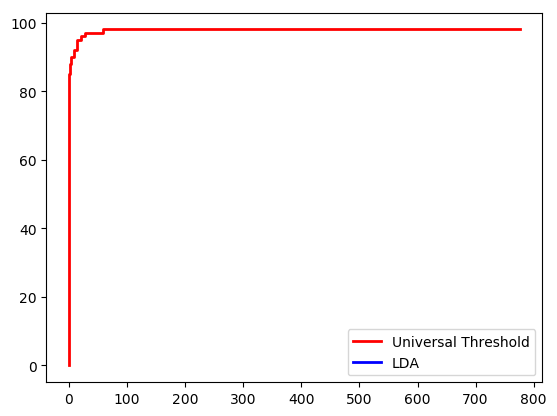

In [18]:
using PyPlot
fig, ax = subplots()
x_ron, y_ron = false_pos_neg_graph(count_tag, real_tags)
ax[:plot](x_ron, y_ron, linewidth=2, color="r", label="Universal Threshold")
x_us, y_us = false_pos_neg_graph(likely_real, real_tags) 
ax[:plot](x_us, y_us, linewidth=2, color="b", label="LDA")
ax[:legend]();